```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [1]:
#gpu
!pip install diffusers transformers accelerate safetensors

In [2]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt

In [3]:
pipeline = DiffusionPipeline.from_pretrained(
        pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0",
        torch_dtype=torch.float16,
        use_safetensors=True
    ).to("cuda")
pipeline.enable_attention_slicing()
generator = torch.Generator(device="cuda").manual_seed(123)
image = pipeline(prompt="A photo realistic of a white pointer dog with light brown spots in the body",generator=generator,num_inference_steps=20).images[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

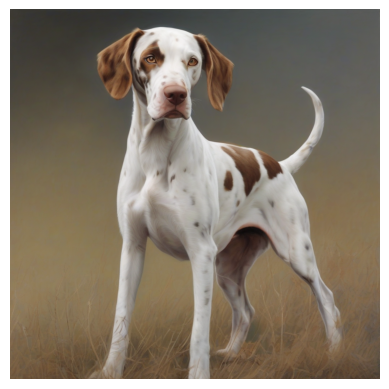

In [4]:
plt.axis('off')
plt.imshow(image)
plt.show()

In [5]:
pipeline.components

{'vae': AutoencoderKL(
   (encoder): Encoder(
     (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (down_blocks): ModuleList(
       (0): DownEncoderBlock2D(
         (resnets): ModuleList(
           (0-1): 2 x ResnetBlock2D(
             (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
             (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
             (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
             (dropout): Dropout(p=0.0, inplace=False)
             (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
             (nonlinearity): SiLU()
           )
         )
         (downsamplers): ModuleList(
           (0): Downsample2D(
             (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
           )
         )
       )
       (1): DownEncoderBlock2D(
         (resnets): ModuleList(
           (0): ResnetBlock2D(
           

In [6]:
pipeline.scheduler

EulerDiscreteScheduler {
  "_class_name": "EulerDiscreteScheduler",
  "_diffusers_version": "0.26.3",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "interpolation_type": "linear",
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "sigma_max": null,
  "sigma_min": null,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "timestep_type": "discrete",
  "trained_betas": null,
  "use_karras_sigmas": false
}

In [7]:
pipeline.scheduler.compatibles

[diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscret

In [5]:
from diffusers import PNDMScheduler

  0%|          | 0/20 [00:00<?, ?it/s]

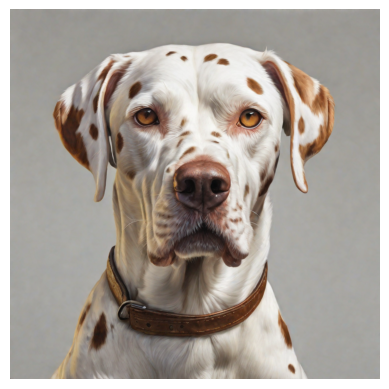

In [7]:
pipeline.scheduler = PNDMScheduler.from_config(pipeline.scheduler.config)

image = pipeline(prompt="A photo realistic of a white pointer dog with light brown spots in the body",generator=generator,num_inference_steps=20).images[0]
plt.axis('off')
plt.imshow(image)
plt.show()